In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 60)
pd.options.mode.chained_assignment = None
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context(font_scale=2)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

/kaggle/input/itk-2020/x_test.csv
/kaggle/input/itk-2020/y_train.csv
/kaggle/input/itk-2020/x_train.csv
/kaggle/input/itk-2020/y_test_baseline.csv


In [2]:
X = pd.read_csv("../input/itk-2020/x_train.csv")
y = pd.read_csv("../input/itk-2020/y_train.csv")
X_test = pd.read_csv("../input/itk-2020/x_test.csv")
y_test = pd.read_csv("../input/itk-2020/y_test_baseline.csv")

In [3]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
X.info()
y.info()
X_test.info()
y_test.info()

X shape:  (406708, 55)
y shape:  (406708, 2)
X_test shape:  (174304, 55)
y_test shape:  (174304, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   id                                  406708 non-null  int64
 1   Elevation                           406708 non-null  int64
 2   Aspect                              406708 non-null  int64
 3   Slope                               406708 non-null  int64
 4   Horizontal_Distance_To_Hydrology    406708 non-null  int64
 5   Vertical_Distance_To_Hydrology      406708 non-null  int64
 6   Horizontal_Distance_To_Roadways     406708 non-null  int64
 7   Hillshade_9am                       406708 non-null  int64
 8   Hillshade_Noon                      406708 non-null  int64
 9   Hillshade_3pm                       406708 non-null  int64
 10  Horizontal_Dista

In [4]:
X.drop("id", axis='columns', inplace=True)
y.drop("id", axis='columns', inplace=True)
X_test.drop("id", axis='columns', inplace=True)
y_test.drop("id", axis='columns', inplace=True)

In [5]:
display(X.describe(), y.describe(), X_test.describe(), y_test.describe())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.00000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000
mean,2959.329730,155.763309,14.103413,269.485181,46.467994,2349.097488,212.107827,223.335543,142.593190,1979.708533,0.449084,0.051582,0.435716,0.063618,0.005195,0.012992,0.008286,0.021470,0.002722,0.011391,0.000170,0.000312,0.001992,0.056072,0.021185,0.051388,0.030061,0.001033,0.000005,0.00492,0.005906,0.003361,0.007025,0.015891,0.001475,0.057206,0.099614,0.036417,0.000814,0.004438,0.001891,0.001687,0.198135,0.052185,0.044305,0.090382,0.077468,0.002801,0.003236,0.000224,0.000548,0.026926,0.023734,0.015139
std,280.028028,111.925462,7.490411,212.462577,58.327213,1559.559608,26.785128,19.777075,38.269583,1323.353986,0.497401,0.221183,0.495851,0.244072,0.071892,0.113240,0.090650,0.144945,0.052100,0.106121,0.013024,0.017668,0.044583,0.230061,0.144000,0.220789,0.170755,0.032119,0.002218,0.06997,0.076623,0.057878,0.083519,0.125054,0.038381,0.232235,0.299486,0.187325,0.028517,0.066471,0.043442,0.041035,0.398595,0.222400,0.205771,0.286728,0.267333,0.052846,0.056792,0.014957,0.023410,0.161867,0.152221,0.122104
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2995.000000,127.000000,13.000000,218.000000,30.000000,1994.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

,Cover_Type
count,406708.000000
mean,2.051472
std,1.396507
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,7.000000


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,174304.000000,174304.000000,174304.000000,174304.00000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000,174304.000000
mean,2959.448297,155.408304,14.104381,269.29530,46.304198,2352.594559,212.235233,223.279454,142.376767,1981.650840,0.448355,0.051089,0.436909,0.063647,0.005267,0.012857,0.008336,0.021021,0.002811,0.011141,0.000207,0.000298,0.001933,0.056390,0.021767,0.052041,0.029862,0.001027,0.000006,0.004842,0.005852,0.003052,0.006678,0.016041,0.001365,0.057985,0.098896,0.037102,0.000820,0.004498,0.001819,0.001492,0.198871,0.051324,0.043872,0.090417,0.078294,0.002708,0.003299,0.000161,0.000430,0.026517,0.023826,0.014876
std,279.884475,111.886247,7.483199,212.75225,58.220546,1558.545311,26.734162,19.749137,38.285750,1326.158788,0.497327,0.220180,0.496005,0.244124,0.072381,0.112657,0.090921,0.143454,0.052946,0.104964,0.014370,0.017270,0.043928,0.230674,0.145921,0.222111,0.170206,0.032030,0.002395,0.069417,0.076273,0.055162,0.081446,0.125633,0.036927,0.233716,0.298523,0.189012,0.028631,0.066915,0.042607,0.038593,0.399152,0.220659,0.204810,0.286779,0.268635,0.051967,0.057341,0.012673,0.020739,0.160667,0.152508,0.121058
min,1863.000000,0.000000,0.000000,0.00000,-166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2810.000000,58.000000,9.000000,108.00000,7.000000,1110.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2997.000000,127.000000,13.000000,218.00000,29.000000,2002.000000,218.000000,226.000000,143.000000,1711.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

,Cover_Type
count,174304.000000
mean,2.361724
std,1.941038
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,7.000000


In [6]:
def outlier_function(df, column):
    Q1 = np.percentile(np.array(df[column].tolist()), 25)
    Q3 = np.percentile(np.array(df[column].tolist()), 75)
    IQ = Q3 - Q1
    
    lower_limit = Q1-(3*IQ)
    upper_limit = Q3+(3*IQ)
    outlier_count = 0
                      
    for value in df[column].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [7]:
for column in X.columns:
    if outlier_function(X, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(X, column)[2], column))

for column in X_test.columns:
    if outlier_function(X, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(X, column)[2], column))

There are 189 outliers in Slope
There are 199 outliers in Horizontal_Distance_To_Hydrology
There are 3729 outliers in Vertical_Distance_To_Hydrology
There are 727 outliers in Hillshade_9am
There are 835 outliers in Hillshade_Noon
There are 7 outliers in Horizontal_Distance_To_Fire_Points
There are 20979 outliers in Wilderness_Area_2
There are 25874 outliers in Wilderness_Area_4
There are 2113 outliers in Soil_Type_1
There are 5284 outliers in Soil_Type_2
There are 3370 outliers in Soil_Type_3
There are 8732 outliers in Soil_Type_4
There are 1107 outliers in Soil_Type_5
There are 4633 outliers in Soil_Type_6
There are 69 outliers in Soil_Type_7
There are 127 outliers in Soil_Type_8
There are 810 outliers in Soil_Type_9
There are 22805 outliers in Soil_Type_10
There are 8616 outliers in Soil_Type_11
There are 20900 outliers in Soil_Type_12
There are 12226 outliers in Soil_Type_13
There are 420 outliers in Soil_Type_14
There are 2 outliers in Soil_Type_15
There are 2001 outliers in Soil_T

In [8]:
soil_columns = [col_s for col_s in X.columns if "Soil" in col_s]
count_s = 0

for col_s in soil_columns:
    count_s += X[col_s]

print(sum(count_s))

count_w = X["Wilderness_Area_1"] + X["Wilderness_Area_2"] + X["Wilderness_Area_3"] + X["Wilderness_Area_4"]
print(sum(count_w))

406708
406708


Text(0.5, 1.05, 'Pearson Correlation of All Features')

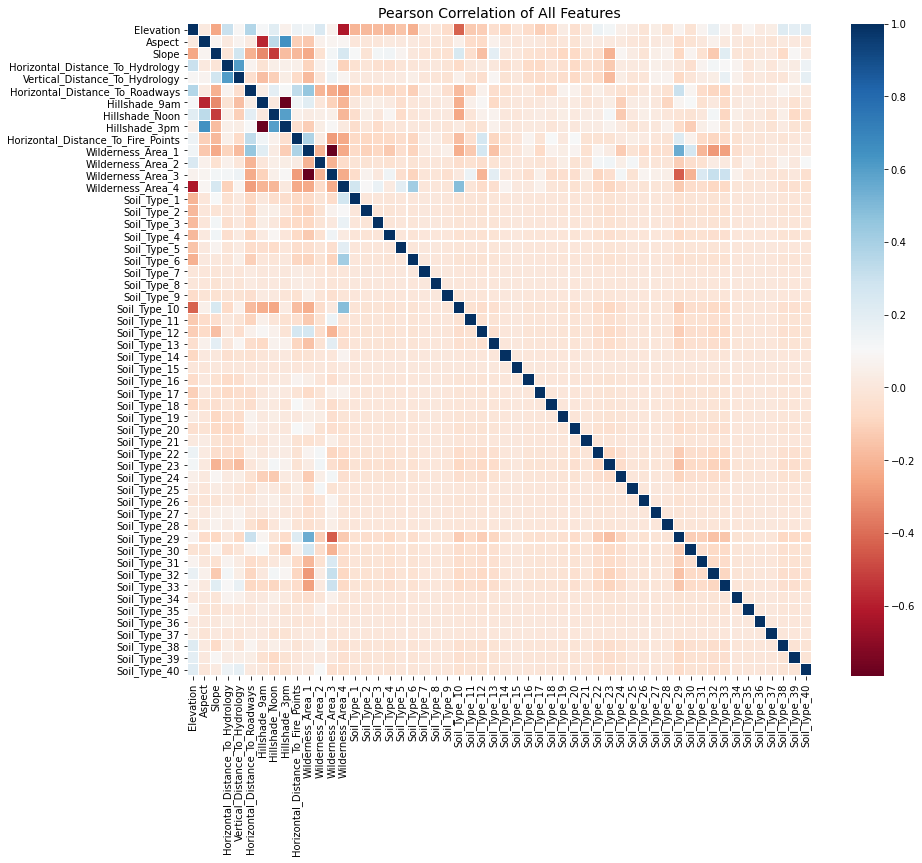

In [9]:
plt.figure(figsize=(14,12))
sns.heatmap(X.corr(),linewidths=0.1,vmax=1.0, square=False, cmap=plt.cm.RdBu, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

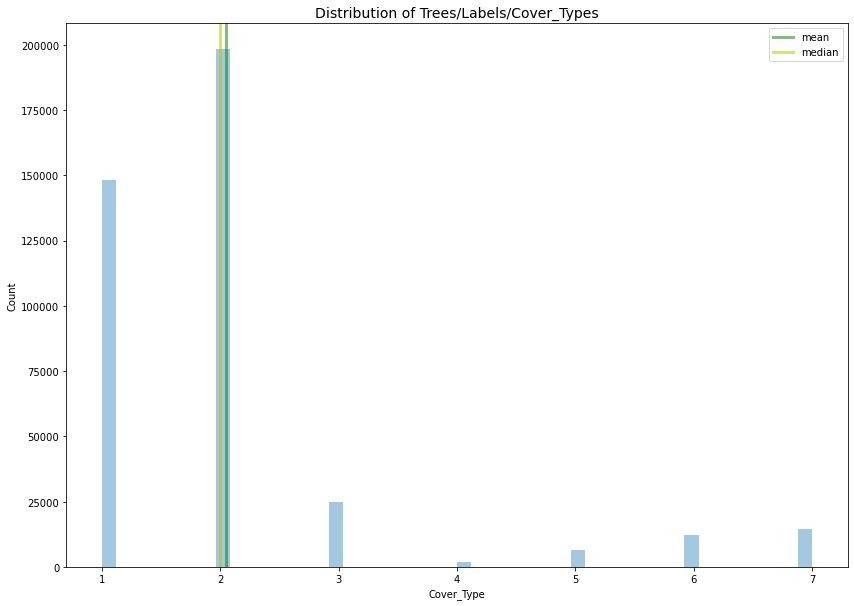

In [10]:
figsize(14,10)
sns.distplot(y, kde=False)
plt.axvline(x=y.Cover_Type.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=y.Cover_Type.median(), linewidth=3, color='y', label="median", alpha=0.5)
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of Trees/Labels/Cover_Types", size=14)
plt.legend(["mean", "median"])

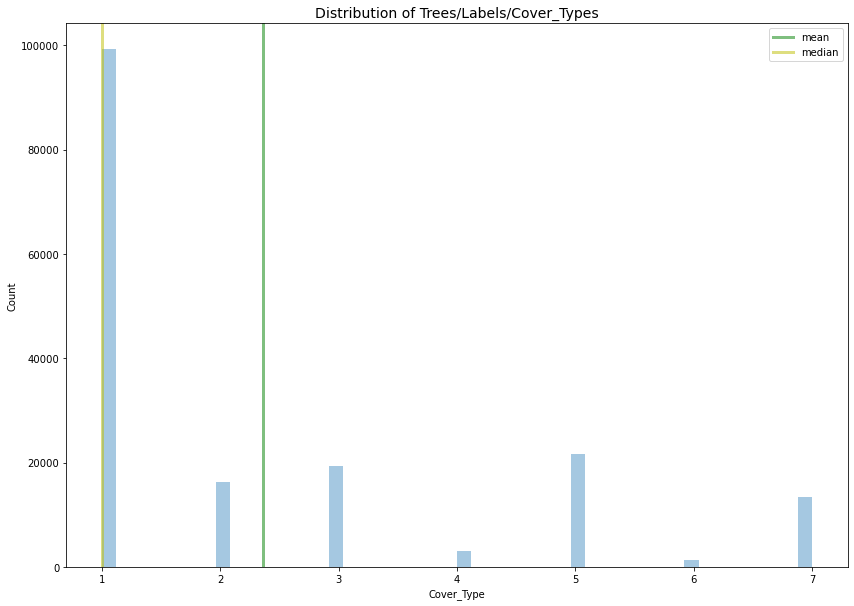

In [11]:
figsize(14,10)
sns.distplot(y_test, kde=False)
plt.axvline(x=y_test.Cover_Type.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=y_test.Cover_Type.median(), linewidth=3, color='y', label="median", alpha=0.5)
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of Trees/Labels/Cover_Types", size=14)
plt.legend(["mean", "median"])

In [12]:
y.groupby('Cover_Type').size()

Cover_Type
1    148288
2    198310
3     25028
4      1923
5      6645
6     12157
7     14357
dtype: int64

In [13]:
y_test.groupby('Cover_Type').size()

Cover_Type
1    99239
2    16354
3    19330
4     3080
5    21728
6     1250
7    13323
dtype: int64

In [14]:
X.drop("Hillshade_9am", axis='columns', inplace=True)
X_test.drop("Hillshade_9am", axis='columns', inplace=True)

In [15]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.30, random_state = 10, stratify=y['Cover_Type'])

In [16]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train,np.ravel(y_train))
ab_pred = ab.predict(x_valid)
print(accuracy_score(y_valid, ab_pred))
print(classification_report(y_valid, ab_pred, labels=np.arange(1, 8)))

0.4016703138190193
              precision    recall  f1-score   support

           1       0.44      0.54      0.48     44487
           2       0.76      0.29      0.42     59493
           3       0.38      0.23      0.29      7508
           4       0.00      0.00      0.00       577
           5       0.00      0.00      0.00      1994
           6       0.20      0.76      0.31      3647
           7       0.12      0.74      0.21      4307

    accuracy                           0.40    122013
   macro avg       0.27      0.37      0.25    122013
weighted avg       0.56      0.40      0.42    122013



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
xgb = XGBClassifier()
xgb.fit(x_train,np.ravel(y_train))
xgb_pred = xgb.predict(x_valid)
print(accuracy_score(y_valid, xgb_pred))
print(classification_report(y_valid, xgb_pred, labels=np.arange(1, 8)))

0.7443960889413423
              precision    recall  f1-score   support

           1       0.73      0.73      0.73     44487
           2       0.76      0.82      0.79     59493
           3       0.68      0.85      0.75      7508
           4       0.78      0.55      0.65       577
           5       0.76      0.10      0.18      1994
           6       0.54      0.11      0.18      3647
           7       0.84      0.54      0.66      4307

    accuracy                           0.74    122013
   macro avg       0.73      0.53      0.56    122013
weighted avg       0.74      0.74      0.73    122013



In [18]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train,np.ravel(y_train))
rf_pred = rf.predict(x_valid)
print(accuracy_score(y_valid, rf_pred))
print(classification_report(y_valid, rf_pred, labels=np.arange(1, 8)))

0.9474892019702819
              precision    recall  f1-score   support

           1       0.96      0.93      0.95     44487
           2       0.94      0.97      0.96     59493
           3       0.94      0.95      0.94      7508
           4       0.92      0.84      0.88       577
           5       0.93      0.74      0.83      1994
           6       0.92      0.89      0.90      3647
           7       0.97      0.94      0.95      4307

    accuracy                           0.95    122013
   macro avg       0.94      0.90      0.92    122013
weighted avg       0.95      0.95      0.95    122013



In [19]:
rf = RandomForestClassifier()
rf_param_grid = {'n_estimators': [500], #Tried parameters:50,100,200,500
                 'criterion':['entropy'], #Tried parameters:'gini','entropy'
                 'random_state':[42],
                 'n_jobs':[-1]}
rf_model = GridSearchCV(rf, param_grid=rf_param_grid, n_jobs=-1)
rf_model.fit(x_train,np.ravel(y_train))
print("Best Hyper Parameters:\n",rf_model.best_params_)
rf_prediction = rf_model.predict(x_valid)
print(accuracy_score(y_valid, rf_prediction))
print(classification_report(y_valid, rf_prediction, labels=np.arange(1, 8)))
display(metrics.confusion_matrix(rf_prediction,y_valid))
rf_best = rf_model.best_estimator_

Best Hyper Parameters:
 {'criterion': 'entropy', 'n_estimators': 500, 'n_jobs': -1, 'random_state': 42}
0.9510789833870161
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     44487
           2       0.95      0.97      0.96     59493
           3       0.94      0.96      0.95      7508
           4       0.91      0.85      0.88       577
           5       0.93      0.76      0.84      1994
           6       0.93      0.89      0.91      3647
           7       0.97      0.95      0.96      4307

    accuracy                           0.95    122013
   macro avg       0.94      0.90      0.92    122013
weighted avg       0.95      0.95      0.95    122013



array([[41740,  1420,     1,     0,    31,     6,   204],
       [ 2625, 57771,   149,     0,   407,   100,    27],
       [    1,   120,  7188,    66,    22,   259,     0],
       [    0,     0,    26,   492,     0,    21,     0],
       [    7,   100,     8,     0,  1518,     2,     0],
       [    2,    67,   136,    19,    16,  3259,     0],
       [  112,    15,     0,     0,     0,     0,  4076]])

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train,np.ravel(y_train))
knn_pred = knn.predict(x_valid)
print(accuracy_score(y_valid, knn_pred))
print(classification_report(y_valid, knn_pred, labels=np.arange(1, 8)))

0.9556276790178095
              precision    recall  f1-score   support

           1       0.96      0.95      0.96     44487
           2       0.96      0.97      0.96     59493
           3       0.94      0.96      0.95      7508
           4       0.89      0.73      0.80       577
           5       0.89      0.85      0.87      1994
           6       0.92      0.90      0.91      3647
           7       0.97      0.95      0.96      4307

    accuracy                           0.96    122013
   macro avg       0.93      0.90      0.92    122013
weighted avg       0.96      0.96      0.96    122013



In [21]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[3], #Tried parameters: 1,2,3,4,5,8,16,32
            'weights':['distance'], #Tried parameters: 'uniform','distance'
            'algorithm':['auto'], #Tried parameters: ‘auto’, ‘ball_tree’, ‘kd_tree’
            'leaf_size':[7], #Tried parameters: 2,4,6,7,8,9,10,16,30
            'p':[1], #Tried parameters: 1,2
            'n_jobs':[-1]}
knn_model = GridSearchCV(knn, param_grid=param_grid, n_jobs=-1)
knn_model.fit(x_train,np.ravel(y_train))
print("Best Hyper Parameters:\n",knn_model.best_params_)
knn_prediction = knn_model.predict(x_valid)
print("Accuracy:",metrics.accuracy_score(knn_prediction,y_valid))
print(classification_report(y_valid, knn_prediction, labels=np.arange(1, 8)))
display(metrics.confusion_matrix(knn_prediction,y_valid))
knn_best = knn_model.best_estimator_

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 7, 'n_jobs': -1, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy: 0.9621433781646218
              precision    recall  f1-score   support

           1       0.96      0.96      0.96     44487
           2       0.97      0.97      0.97     59493
           3       0.95      0.96      0.96      7508
           4       0.90      0.83      0.86       577
           5       0.89      0.87      0.88      1994
           6       0.93      0.92      0.93      3647
           7       0.96      0.96      0.96      4307

    accuracy                           0.96    122013
   macro avg       0.94      0.92      0.93    122013
weighted avg       0.96      0.96      0.96    122013



array([[42749,  1398,     1,     0,    26,     4,   144],
       [ 1563, 57712,    99,     1,   208,    78,    26],
       [    3,   111,  7213,    69,    15,   166,     0],
       [    0,     0,    33,   478,     0,    23,     0],
       [   23,   186,     9,     0,  1734,     5,     0],
       [    2,    70,   153,    29,    10,  3371,     0],
       [  147,    16,     0,     0,     1,     0,  4137]])

In [22]:
print('xgb: {}'.format(xgb.score(x_valid, y_valid)))
print('rf: {}'.format(rf_best.score(x_valid, y_valid)))
print('knn: {}'.format(knn_best.score(x_valid, y_valid)))

xgb: 0.7443960889413423
rf: 0.9510789833870161
knn: 0.9621433781646218


In [23]:
estimators=[('rf', rf_best), ('knn', knn_best)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(x_train, np.ravel(y_train))
ensemble.score(x_valid, y_valid)

0.9578077745813971

In [24]:
knn_wth_p = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=7, p=1, n_jobs=-1)
knn_wth_p.fit(X, np.ravel(y))
y_pred = knn_wth_p.predict(X_test)

In [25]:
ind = y_pred.shape
id = np.arange(ind[0])
df = pd.DataFrame(data={"id":id,"Cover_Type":y_pred})
df.to_csv("my_prediction.csv",index=False)